In [3]:
import pandas as pd
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import csv
from nltk.tokenize import word_tokenize

sns.set_style('darkgrid')

In [9]:
unknown_df = pd.read_excel('../Dataset/Questions/unknown_results_annotation.xlsx')
with open('../Dataset/Questions/question-syifa-test.json', 'r') as f:
    test_data = json.load(f)
pos_ids = dict()
neg_ids = dict()
for row in test_data:
    qid = int(row['question']['id'])
    pos_ids[qid] = []
    neg_ids[qid] = []
    for pos_ctx in row['ctxs']:
        pos_ids[qid].append(pos_ctx['id'])
    for neg_ctx in row['neg_ctxs']:
        neg_ids[qid].append(neg_ctx['id'])


In [10]:
unknown_df.head()

,Unnamed: 0,question_id,question_text,question_title,passage_id,passage_text,passage_title,relevance_krisna,relevance_mahendra,relevance_alfan,final_relevance
0,0.0,3,sore dok . . maaf dok saya sudah 4 hari mengal...,benjolan di sekitar kelamin,AD-23768,sore dok . sudah 2 minggu saya ada benjolan ke...,benjolon di kepala belakang,0.0,NaN,0.0,0.0
1,1.0,3,sore dok . . maaf dok saya sudah 4 hari mengal...,benjolan di sekitar kelamin,TD-3617,"tanya dok , saya laki-laki umur 22 tahun . sud...",di paha saya ada seperti benjolan namun di dal...,0.0,NaN,1.0,NaN
2,2.0,3,sore dok . . maaf dok saya sudah 4 hari mengal...,benjolan di sekitar kelamin,KD-14989,"saya akhyani , saya mau tanya , saya ada benjo...",benjolan di selangkangan,1.0,NaN,1.0,1.0
3,3.0,3,sore dok . . maaf dok saya sudah 4 hari mengal...,benjolan di sekitar kelamin,DH-868,"dok , sejak smp saya menemukan benjolan di seb...",apa penyebab benjolan di seputar kemaluan ?,2.0,NaN,2.0,2.0
4,4.0,3,sore dok . . maaf dok saya sudah 4 hari mengal...,benjolan di sekitar kelamin,AD-16770,"pagi dok . saya mau tanya , saya memiliki benj...",benjolan di leher .,1.0,NaN,0.0,NaN


In [62]:
dpr_good = None
dpr_bad = None

unknown_df_good = unknown_df[unknown_df['final_relevance']==2]
unknown_df_bad = unknown_df[unknown_df['final_relevance']==0]

for idx, row in unknown_df_good.iterrows():
    if row['passage_id'] not in pos_ids[row['question_id']]:
        dpr_good = unknown_df_good.iloc[idx,:]
        break
        
for idx, row in unknown_df_bad.iterrows():
    if row['passage_id'] not in pos_ids[row['question_id']]:
        dpr_bad = unknown_df_bad.iloc[idx,:]
        break

In [64]:
dpr_good

Unnamed: 0                                                         43.0
question_id                                                          10
question_text         dear dokter , jantung saya suka merasa deg-deg...
question_title        jantung berdebar , apakah tandanya ada masalah...
passage_id                                                      TD-1246
passage_text          asalamualaikum dokter maaf mau tanya . saya me...
passage_title            apakah saya mengalami gejala sakit jantung . ?
relevance_krisna                                                    2.0
relevance_mahendra                                                  NaN
relevance_alfan                                                     2.0
final_relevance                                                     2.0
Name: 43, dtype: object

In [77]:
dpr_good = {
    'question': {
        'id': str(dpr_good['question_id']),
        'title': dpr_good['question_title'],
        'text': dpr_good['question_text']
    },
    'ctx': {
        'id': str(dpr_good['passage_id']),
        'title': dpr_good['passage_title'],
        'text': dpr_good['passage_text']
    }
}

In [65]:
dpr_bad

Unnamed: 0                                                          0.0
question_id                                                           3
question_text         sore dok . . maaf dok saya sudah 4 hari mengal...
question_title                              benjolan di sekitar kelamin
passage_id                                                     AD-23768
passage_text          sore dok . sudah 2 minggu saya ada benjolan ke...
passage_title                               benjolon di kepala belakang
relevance_krisna                                                    0.0
relevance_mahendra                                                  NaN
relevance_alfan                                                     0.0
final_relevance                                                     0.0
Name: 0, dtype: object

In [78]:
dpr_bad = {
    'question': {
        'id': str(dpr_bad['question_id']),
        'title': dpr_bad['question_title'],
        'text': dpr_bad['question_text']
    },
    'ctx': {
        'id': str(dpr_bad['passage_id']),
        'title': dpr_bad['passage_title'],
        'text': dpr_bad['passage_text']
    }
}

In [66]:
import glob 
import json

q_results = dict()
for filename in tqdm(glob.glob('../Results/*.json')):
    if 'dpr' not in filename.lower():
        continue
    json_data = []
    with open(filename, 'r') as f:
        json_data = json.load(f)
    for idx,row in enumerate(json_data):
        qid = int(row['question']['id'])
        if qid not in q_results:
            q_results[qid] = []
        for ctx in row['ctxs']:
            q_results[qid] = set(q_results[qid])
            q_results[qid].add(ctx['id'])
            q_results[qid] = list(q_results[qid])

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 282/282 [00:00<00:00, 330.07it/s]


In [67]:
q_results.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 19, 20, 21, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [185]:
sparse_good = None
sparse_bad = None

for row in test_data:
    stopped = False
    qid = int(row['question']['id'])
    question = row['question']
    for ctx in row['ctxs']:
        if ctx['id'] not in q_results[qid]:
            sparse_good = {
                'question': question,
                'ctx': ctx
            }
            stopped = True
            break
    if stopped:
        break
    
    
for row in test_data:
    qid = int(row['question']['id'])
    question = row['question']
    for ctx in row['neg_ctxs']:
        if ctx['id'] not in q_results[qid]:
            sparse_bad = {
                'question': question,
                'ctx': ctx
            }
            break

In [186]:
sparse_good

{'question': {'id': '1',
  'title': 'cara mengatasi pusing , lemas dan hidung berair',
  'text': 'malam dok , sejak 2 hari yang lalu badan saya pusing dan lemas hari ini hidung saya mengeluarkan ingus terus menerus , bagaimana cara mengatasi nya ya dok ? terima kasih sebelumnya'},
 'ctx': {'id': 'AD-8111',
  'title': 'cara pengobatan gejala mual pusing   lemas   dan keringat dingin',
  'text': 'selamat malam dok saya mau tanya saya sakit kurang lebih 3 hari gejala yang saya derita mual   pusing   lemas dan di sertai keringat dingin . bagai mana cara pengobatannya dan penyakit apa itu dok   terima kasih'}}

In [187]:
sparse_bad

{'question': {'id': '50',
  'title': 'sariawan dan kaitannya dengan demam , mual , pusing',
  'text': 'dok saya sudah hampir 1 minggu sariawan yang di sebabkan terbentur oleh sikat gigi.dan pada hari ke 7 malah lari ke demam dan mual juga ousing dok . kenapa ya dok ?'},
 'ctx': {'id': 'AD-20306',
  'title': 'rasa sakit di bagian tengah perut',
  'text': 'dok   saya minggu lalu ada mual   muntah   sakit perut hilang timbul   pusing dan demam   saya sudah konsumsi obat dan sudah hilang . habis 4 hari setelah sakit perut hilang timbul itu   saya mual-mual dan muntah dan sakit perut lagi   sekaran mual-mual dan muntah tidak ada tetapi cuma ada mencret dan sakit perut itu kenapa ya dok ? sudah satu minggu lebih penyakit ini ada'}}

In [191]:
from wordcloud import WordCloud

def gen_ngrams_set(sentence, max_tokens):
    unigrams = set()
    bigrams = set()
    trigrams = set()
    tokenized_sentence = list(word_tokenize(sentence.lower()))[:max_tokens]
    for word in tokenized_sentence:
        if word.isalpha():
            unigrams.add(word.lower())
    for i in range(len(tokenized_sentence)-1):
        if tokenized_sentence[i].isalpha() and tokenized_sentence[i+1].isalpha():
            bigrams.add(f"{tokenized_sentence[i].lower()} {tokenized_sentence[i+1].lower()}")
    for i in range(len(tokenized_sentence)-2):
        if tokenized_sentence[i].isalpha() and tokenized_sentence[i+1].isalpha() and tokenized_sentence[i+2].isalpha():
            trigrams.add(f"{tokenized_sentence[i].lower()} {tokenized_sentence[i+1].lower()} {tokenized_sentence[i+2].lower()}")
    return unigrams, bigrams, trigrams

def common_unique_terms_analysis(query, passage, max_tokens):
    q_unigrams, q_bigrams, q_trigrams = gen_ngrams_set(query, max_tokens)
    p_unigrams, p_bigrams, p_trigrams = gen_ngrams_set(passage, max_tokens)
    combined_unigrams, combined_bigrams, combined_trigrams = q_unigrams.intersection(p_unigrams), q_bigrams.intersection(p_bigrams), q_trigrams.intersection(p_trigrams)
    unique_unigrams_overlap = len(combined_unigrams)/len(p_unigrams)*100
    unique_bigrams_overlap = len(combined_bigrams)/len(p_bigrams)*100
    unique_trigrams_overlap = len(combined_trigrams)/len(p_trigrams)*100

    return (unique_unigrams_overlap, unique_bigrams_overlap, unique_trigrams_overlap), (combined_unigrams, combined_bigrams, combined_trigrams)


def common_unique_terms_frequency_analysis(passage, combined_unigrams, combined_bigrams, combined_trigrams, max_tokens, data_type):
    combined_unigrams_cnt = 0
    combined_bigrams_cnt = 0
    combined_trigrams_cnt = 0

    total_unigrams_cnt = 0
    total_bigrams_cnt = 0
    total_trigrams_cnt = 0
    
    unigrams_map = dict()
    bigrams_map = dict()
    trigrams_map = dict()
    
    tokenized_passage = list(word_tokenize(passage))[:max_tokens]
    for i in range(len(tokenized_passage)-1):
        unigram = tokenized_passage[i:i+1]
        bigram = tokenized_passage[i:i+2]
        trigram = tokenized_passage[i:i+3]
        total_unigrams_cnt += 1 
        total_bigrams_cnt +=1 if len(bigram)==2 else 0
        total_trigrams_cnt +=1 if len(trigram)==3 else 0
        unigram = unigram[0]
        bigram = ' '.join(bigram)
        trigram = ' '.join(trigram)
        
        if unigram in combined_unigrams:
            if unigram not in unigrams_map:
                unigrams_map[unigram] = 0
            unigrams_map[unigram] += 1
            combined_unigrams_cnt += 1
        if bigram in combined_bigrams:
            if bigram not in bigrams_map:
                bigrams_map[bigram] = 0
            bigrams_map[bigram] += 1
            combined_bigrams_cnt += 1
        if trigram in combined_trigrams:
            if trigram not in trigrams_map:
                trigrams_map[trigram] = 0
            trigrams_map[trigram] += 1
            combined_trigrams_cnt += 1
    unigrams_map = sorted(unigrams_map.items(), key=lambda x: x[1], reverse=True)
    bigrams_map = sorted(bigrams_map.items(), key=lambda x: x[1], reverse=True)
    trigrams_map = sorted(trigrams_map.items(), key=lambda x: x[1], reverse=True)
    
    unigrams_map_words = [val[0] for val in unigrams_map]
    unigrams_map_freq = [val[1] for val in unigrams_map]
    
    bigrams_map_words = [val[0] for val in bigrams_map]
    bigrams_map_freq = [val[1] for val in bigrams_map]
    
    trigrams_map_words = [val[0] for val in trigrams_map]
    trigrams_map_freq = [val[1] for val in trigrams_map]
    

    plt.bar(unigrams_map_words[:5], unigrams_map_freq[:5])
    plt.title('Most frequent common unigrams in passage')
    plt.xlabel('Unigram')
    plt.ylabel('Frequency')
    plt.savefig(f'{data_type}_frequent_unigram.png')
    plt.show()
    
    plt.bar(bigrams_map_words[:5], bigrams_map_freq[:5])
    plt.title('Most frequent common bigrams in passage')
    plt.xlabel('Bigram')
    plt.ylabel('Frequency')
    plt.savefig(f'{data_type}_frequent_bigram.png')
    plt.show()
    
    plt.bar(trigrams_map_words[:5], trigrams_map_freq[:5])
    plt.title('Most frequent common trigrams in passage')
    plt.xlabel('Trigram')
    plt.ylabel('Frequency')
    plt.savefig(f'{data_type}_frequent_trigram.png')
    plt.show()
    
    frequency_unigrams_overlap = combined_unigrams_cnt/total_unigrams_cnt*100
    frequency_bigrams_overlap = combined_bigrams_cnt/total_bigrams_cnt*100
    frequency_trigrams_overlap  = combined_trigrams_cnt/total_trigrams_cnt*100
    
    return (frequency_unigrams_overlap,frequency_bigrams_overlap, frequency_trigrams_overlap)


def create_wordcloud(common_unigrams, passage, max_tokens, data_type):
    tokenized_passage = list(word_tokenize(passage))[:max_tokens]
    join_string = " ".join([token for token in tokenized_passage if token in common_unigrams])
    wordcloud = WordCloud(background_color ='white', min_font_size = 10).generate(join_string)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.savefig(f'{data_type}_wordcloud.png')
    plt.show()

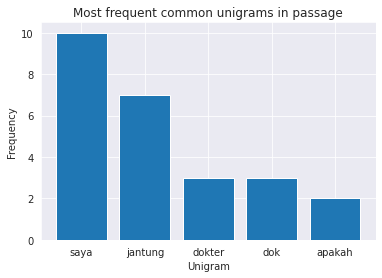

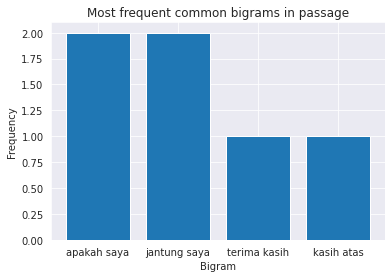

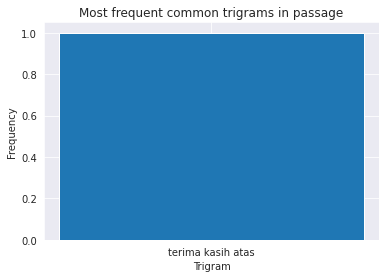

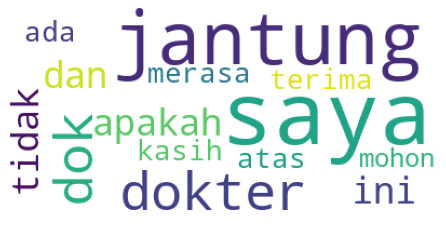

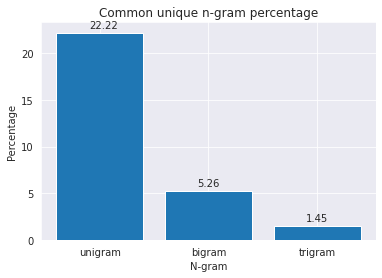

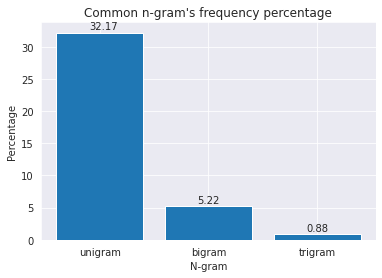

In [200]:
dpr_good_question = f"{dpr_good['question']['title']}. {dpr_good['question']['text']}"
dpr_good_passage = f"{dpr_good['ctx']['title']}. {dpr_good['ctx']['text']}"

unique_overlap, combined_ngrams = common_unique_terms_analysis(dpr_good_question, dpr_good_passage, 512)
frequency_overlap = common_unique_terms_frequency_analysis(dpr_good_passage, combined_ngrams[0], combined_ngrams[1], combined_ngrams[2], 512, 'dpr_good')

create_wordcloud(combined_ngrams[0], dpr_good_passage, 512, 'dpr_good')

xlabels = ['unigram', 'bigram', 'trigram']
plt.bar(xlabels, unique_overlap)
plt.title('Common unique n-gram percentage')
plt.xlabel('N-gram')
plt.ylabel('Percentage')
for index, value in enumerate(unique_overlap):
    plt.text(index-0.1, value+0.5, str(round(value, 2)))
plt.savefig('dpr_good_unique.png')
plt.show()

plt.bar(xlabels, frequency_overlap)
plt.title('Common n-gram\'s frequency percentage')
plt.xlabel('N-gram')
plt.ylabel('Percentage')
for index, value in enumerate(frequency_overlap):
    plt.text(index-0.1, value+0.5, str(round(value, 2)))
plt.savefig('dpr_good_frequency.png')
plt.show()

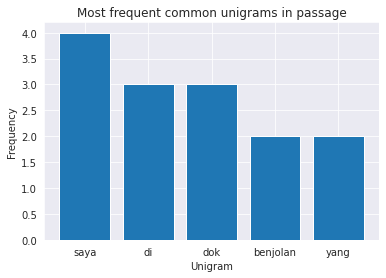

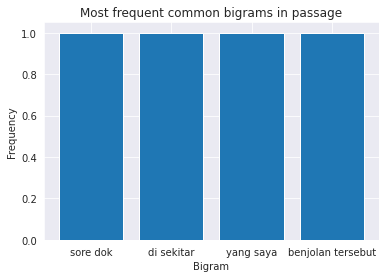

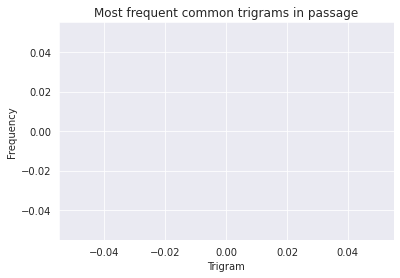

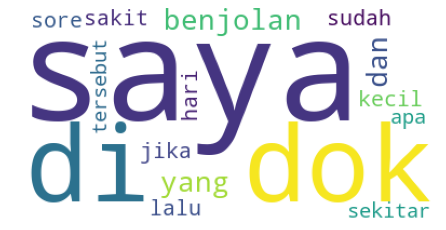

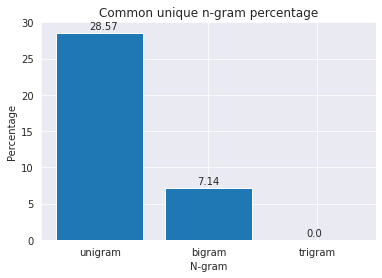

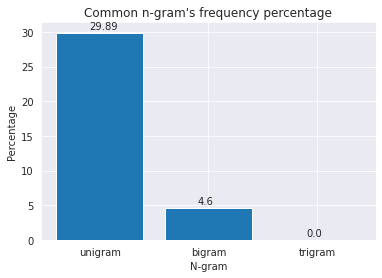

In [201]:
dpr_bad_question = f"{dpr_bad['question']['title']}. {dpr_bad['question']['text']}"
dpr_bad_passage = f"{dpr_bad['ctx']['title']}. {dpr_bad['ctx']['text']}"

unique_overlap, combined_ngrams = common_unique_terms_analysis(dpr_bad_question, dpr_bad_passage, 512)
frequency_overlap = common_unique_terms_frequency_analysis(dpr_bad_passage, combined_ngrams[0], combined_ngrams[1], combined_ngrams[2], 512, 'dpr_bad')

create_wordcloud(combined_ngrams[0], dpr_bad_passage, 512, 'dpr_bad')

xlabels = ['unigram', 'bigram', 'trigram']
plt.bar(xlabels, unique_overlap)
plt.title('Common unique n-gram percentage')
plt.xlabel('N-gram')
plt.ylabel('Percentage')
for index, value in enumerate(unique_overlap):
    plt.text(index-0.1, value+0.5, str(round(value, 2)))
plt.savefig('dpr_bad_unique.png')
plt.show()

plt.bar(xlabels, frequency_overlap)
plt.title('Common n-gram\'s frequency percentage')
plt.xlabel('N-gram')
plt.ylabel('Percentage')
for index, value in enumerate(frequency_overlap):
    plt.text(index-0.1, value+0.5, str(round(value, 2)))
plt.savefig('dpr_bad_frequency.png')
plt.show()

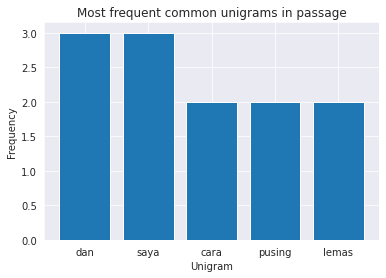

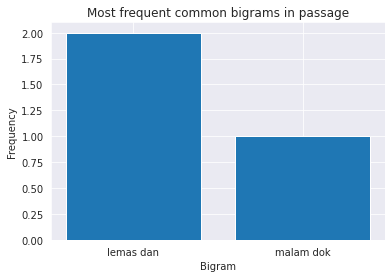

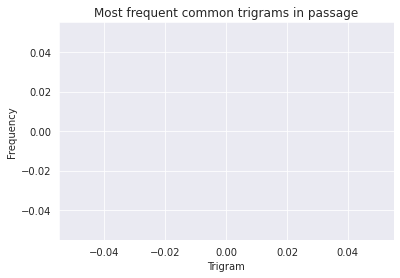

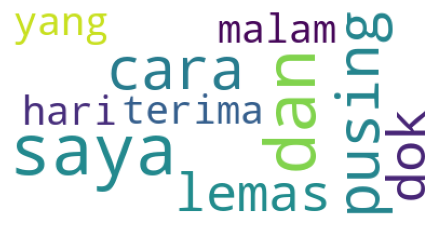

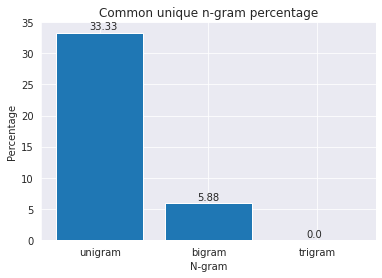

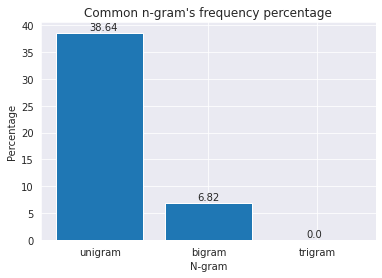

In [202]:
sparse_good_question = f"{sparse_good['question']['title']}. {sparse_good['question']['text']}"
sparse_good_passage = f"{sparse_good['ctx']['title']}. {sparse_good['ctx']['text']}"

unique_overlap, combined_ngrams = common_unique_terms_analysis(sparse_good_question, sparse_good_passage, -1)
frequency_overlap = common_unique_terms_frequency_analysis(sparse_good_passage, combined_ngrams[0], combined_ngrams[1], combined_ngrams[2], -1, 'sparse_good')

create_wordcloud(combined_ngrams[0], sparse_good_passage, -1, 'sparse_good')

xlabels = ['unigram', 'bigram', 'trigram']
plt.bar(xlabels, unique_overlap)
plt.title('Common unique n-gram percentage')
plt.xlabel('N-gram')
plt.ylabel('Percentage')
for index, value in enumerate(unique_overlap):
    plt.text(index-0.1, value+0.5, str(round(value, 2)))
plt.savefig('sparse_good_unique.png')
plt.show()

plt.bar(xlabels, frequency_overlap)
plt.title('Common n-gram\'s frequency percentage')
plt.xlabel('N-gram')
plt.ylabel('Percentage')
for index, value in enumerate(frequency_overlap):
    plt.text(index-0.1, value+0.5, str(round(value, 2)))
plt.savefig('sparse_good_frequency.png')
plt.show()

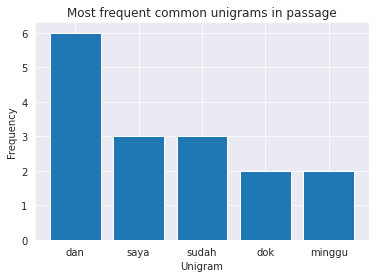

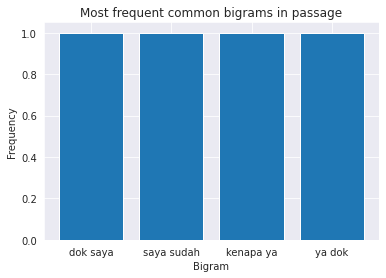

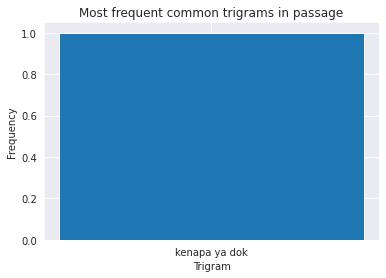

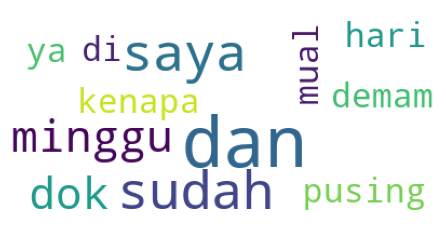

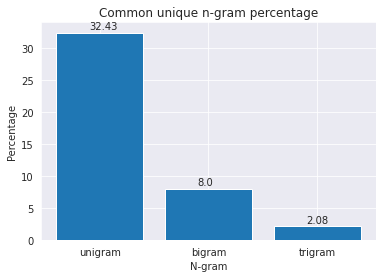

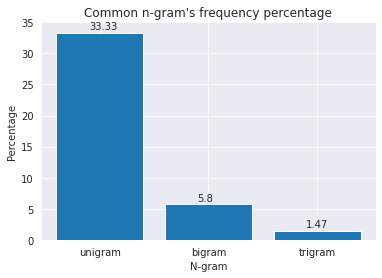

In [203]:
sparse_bad_question = f"{sparse_bad['question']['title']}. {sparse_bad['question']['text']}"
sparse_bad_passage = f"{sparse_bad['ctx']['title']}. {sparse_bad['ctx']['text']}"

unique_overlap, combined_ngrams = common_unique_terms_analysis(sparse_bad_question, sparse_bad_passage, -1)
frequency_overlap = common_unique_terms_frequency_analysis(sparse_bad_passage, combined_ngrams[0], combined_ngrams[1], combined_ngrams[2], -1, 'sparse_bad')

create_wordcloud(combined_ngrams[0], sparse_bad_passage, -1, 'sparse_bad')

xlabels = ['unigram', 'bigram', 'trigram']
plt.bar(xlabels, unique_overlap)
plt.title('Common unique n-gram percentage')
plt.xlabel('N-gram')
plt.ylabel('Percentage')
for index, value in enumerate(unique_overlap):
    plt.text(index-0.1, value+0.5, str(round(value, 2)))
plt.savefig('sparse_bad_unique.png')
plt.show()

plt.bar(xlabels, frequency_overlap)
plt.title('Common n-gram\'s frequency percentage')
plt.xlabel('N-gram')
plt.ylabel('Percentage')
for index, value in enumerate(frequency_overlap):
    plt.text(index-0.1, value+0.5, str(round(value, 2)))
plt.savefig('sparse_bad_frequency.png')
plt.show()

In [147]:
dpr_good

{'question': {'id': '10',
  'title': 'jantung berdebar , apakah tandanya ada masalah jantung ?',
  'text': 'dear dokter , jantung saya suka merasa deg-degan seperti darah tidak lancar . selama ini tidak ada keluhan apapun dan kesehatan saya relatif prima . apakah saya ada penyakit jantung ? mohon informasinya dok . terima kasih atas atensinya . salam hormat .'},
 'ctx': {'id': 'TD-1246',
  'title': 'apakah saya mengalami gejala sakit jantung . ?',
  'text': 'asalamualaikum dokter maaf mau tanya . saya merasa ada yang aneh di detak jantung saya , biasanya detak jantung kan tidak berasa ya dok . ini sudah sekitar 1 mingguan saya merasakan detak jantung saya tidak beraturan , terkadang saya bisa merasakan detak jantung semakin kuat berdetak , dan perut sering kembung dan serasa agak sesak di dada terkadang pada saat detak jantung agak keras . saya mau bertanya apakah saya sedang gejala sakit jantung atau saya cuma masuk angin biasa ya dokter. , ini baru pertama kalinya dok , saya berumur 

In [148]:
dpr_bad

{'question': {'id': '3',
  'title': 'benjolan di sekitar kelamin',
  'text': 'sore dok . . maaf dok saya sudah 4 hari mengalami benjolan di daerah kemaluan mula-mula benjolan tersebut kecil dan sekarang membesar lalu pecah dok . . rasanya linu dan sakit jika malam hari . . kira-kira apa nama penyakit yang saya alami ya dok'},
 'ctx': {'id': 'AD-23768',
  'title': 'benjolon di kepala belakang',
  'text': 'sore dok . sudah 2 minggu saya ada benjolan kecil di kepala bagian belakang diameternya hanya 1 cuma kira-kira . jika ditekan terasa sdkt sakit . setelah saya cek beberapa hari yang lalu , rambut dibenjolon itu tidak ada ( tokak ) dan di sekitar benjolon merah seperti alergi . yang saya tanyakan apa penyebab benjolan tersebut dok ? dan apakah ini termasuk pembekakan kelenjar getah bening ? meskipun saya tidak merasakan gelaja pembekakan kgb . terima kasih , mohon dijawab dok .'}}

In [149]:
sparse_good

{'question': {'id': '50',
  'title': 'sariawan dan kaitannya dengan demam , mual , pusing',
  'text': 'dok saya sudah hampir 1 minggu sariawan yang di sebabkan terbentur oleh sikat gigi.dan pada hari ke 7 malah lari ke demam dan mual juga ousing dok . kenapa ya dok ?'},
 'ctx': {'id': 'AD-141',
  'title': 'obat untuk asam lambung tinggi dan sariawan',
  'text': 'selamat siang dok   obat apa untuk asam lambung tinggi dok   saya sudah minum obat kok belum sembuh juga   terus malah tambah muncul sariawan di lidah dan tenggorokan   apa solusinya dok   tolong cepat balas ? ?'}}

In [150]:
sparse_bad

{'question': {'id': '50',
  'title': 'sariawan dan kaitannya dengan demam , mual , pusing',
  'text': 'dok saya sudah hampir 1 minggu sariawan yang di sebabkan terbentur oleh sikat gigi.dan pada hari ke 7 malah lari ke demam dan mual juga ousing dok . kenapa ya dok ?'},
 'ctx': {'id': 'AD-20306',
  'title': 'rasa sakit di bagian tengah perut',
  'text': 'dok   saya minggu lalu ada mual   muntah   sakit perut hilang timbul   pusing dan demam   saya sudah konsumsi obat dan sudah hilang . habis 4 hari setelah sakit perut hilang timbul itu   saya mual-mual dan muntah dan sakit perut lagi   sekaran mual-mual dan muntah tidak ada tetapi cuma ada mencret dan sakit perut itu kenapa ya dok ? sudah satu minggu lebih penyakit ini ada'}}